<a href="https://colab.research.google.com/github/1234-ad/1234-ad/blob/main/Replication_of_McDonalds_Case_Study_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Loading the McDonald's dataset

In [ ]:
import pandas as pd

# Load the CSV file from the uploaded path
df = pd.read_csv('/content/mcdonalds.csv')


# ***Step-4 : Exploring Data***

Displaying the column names in the dataset

In [ ]:
# Display column names
df.columns.tolist()


['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

Checking the number of rows and columns in the dataset

In [ ]:
# Show number of rows and columns
df.shape


(1453, 15)

Displaying the first 3 rows of the dataset

In [ ]:
# Show first 3 rows
df.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


Extracting segmentation variables and converting categorical responses ("Yes"/"No") to binary format

In [ ]:
# Extract the first 11 columns (segmentation variables)
MD_x = df.iloc[:, 0:11]
# Convert "Yes" to 1 and "No" to 0
MD_x_binary = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)
MD_x_binary.head()



/tmp/ipython-input-8-183730666.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x_binary = MD_x.applymap(lambda x: 1 if x == "Yes" else 0)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


Calculating the proportion of "Yes" responses for each segmentation variable

In [ ]:
# Calculate the column-wise mean (rounded to 2 decimal places)
MD_x_binary.mean().round(2)


,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


 Applying Principal Component Analysis (PCA) to the binary segmentation variables

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Run PCA on binary segmentation variables (from earlier step)
pca = PCA(n_components=11)
pca.fit(MD_x_binary)


PCA(n_components=11)

 Calculating and displaying the proportion and cumulative proportion of variance explained by each principal component

In [ ]:
# Explained variance (Proportion of Variance)
explained_variance = pca.explained_variance_ratio_.round(4)
cumulative_variance = np.cumsum(explained_variance).round(4)

# Display summary table
import pandas as pd

summary_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})

summary_df


,PC,Proportion of Variance,Cumulative Proportion
0,PC1,0.2994,0.2994
1,PC2,0.1928,0.4922
2,PC3,0.1330,0.6252
3,PC4,0.0831,0.7083
4,PC5,0.0595,0.7678
5,PC6,0.0503,0.8181
6,PC7,0.0438,0.8619
7,PC8,0.0395,0.9014
8,PC9,0.0368,0.9382
9,PC10,0.0324,0.9706


Extracting and displaying the PCA loadings (component weights) for each segmentation variable

In [ ]:
# Loadings (aka rotation matrix or component weights)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(11)],
    index=MD_x_binary.columns
)

loadings.round(2)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.48,-0.36,0.30,0.06,0.31,-0.17,-0.28,-0.01,-0.57,0.11,-0.05
convenient,0.16,-0.02,0.06,-0.14,-0.28,0.35,-0.06,0.11,0.02,0.67,0.54
spicy,0.01,-0.02,0.04,0.20,-0.07,0.36,0.71,-0.38,-0.40,0.08,-0.14
fattening,-0.12,0.03,0.32,-0.35,0.07,0.41,-0.39,-0.59,0.16,0.01,-0.25
greasy,-0.30,0.06,0.80,0.25,-0.36,-0.21,0.04,0.14,0.00,-0.01,-0.00
fast,0.11,0.09,0.06,-0.10,-0.11,0.59,-0.09,0.63,-0.17,-0.24,-0.34
cheap,0.34,0.61,0.15,0.12,0.13,0.10,-0.04,-0.14,-0.08,-0.43,0.49
tasty,0.47,-0.31,0.29,-0.00,0.21,0.08,0.36,0.07,0.64,-0.08,-0.02
expensive,-0.33,-0.60,-0.02,0.07,0.00,0.26,-0.07,-0.03,-0.07,-0.45,0.49
healthy,0.21,-0.08,-0.19,0.76,-0.29,0.18,-0.35,-0.18,0.19,0.04,-0.16


In [ ]:
!pip install adjustText


 Creating a perceptual map using PCA to visualize customer perceptions based on the first two principal components

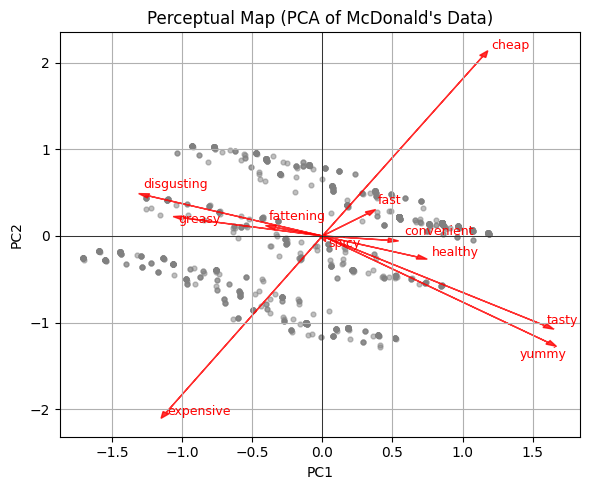

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text

# PCA fit
pca = PCA(n_components=2)
pca_projection = pca.fit_transform(MD_x_binary)

# Loadings
loadings = pca.components_.T
features = MD_x_binary.columns

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], color='grey', alpha=0.5, s=12)

# Arrow scale factor
arrow_scale = 3.5
texts = []

# Draw arrows and prepare text objects for adjustText
for i, feature in enumerate(features):
    x, y = loadings[i, 0] * arrow_scale, loadings[i, 1] * arrow_scale
    plt.arrow(0, 0, x, y, color='red', alpha=0.8,
              head_width=0.05, length_includes_head=True)

    # Add label object for automatic adjustment
    texts.append(plt.text(x, y, feature, color='red', fontsize=9))

# Auto-adjust overlapping labels
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red', lw=0.5))

# Axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map (PCA of McDonald's Data)")
plt.grid(True)
plt.tight_layout()
plt.show()


# ***Step 5: Extracting Segments***

Determining the optimal number of clusters using the Elbow Method with K-Means clustering

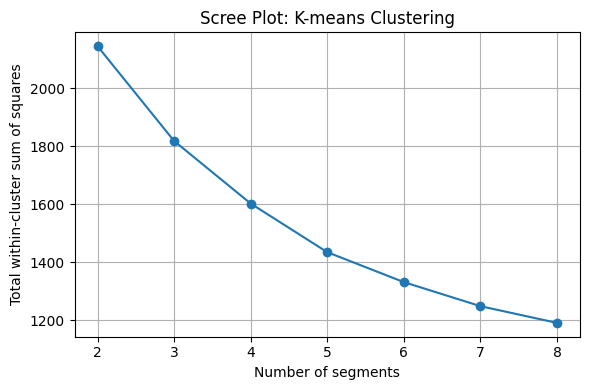

In [ ]:
# Using k-Means
from sklearn.cluster import KMeans
# Store total within-cluster sum of squares (inertia) for each k
sse = []
k_range = range(2, 9)  # equivalent to 2:8 in R

# Run K-means for k = 2 to 8
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x_binary)
    sse.append(kmeans.inertia_)  # same as within-cluster sum of squares

# Plot the scree plot (same as plot(MD.km28))
plt.figure(figsize=(6, 4))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Total within-cluster sum of squares")
plt.title("Scree Plot: K-means Clustering")
plt.grid(True)
plt.tight_layout()
plt.show()


 Performing stability-based clustering analysis using bootstrapping and Adjusted Rand Index (ARI) to evaluate consistency of K-means clustering results



/tmp/ipython-input-16-2293050224.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([stability_results[k] for k in k_range], labels=k_range)


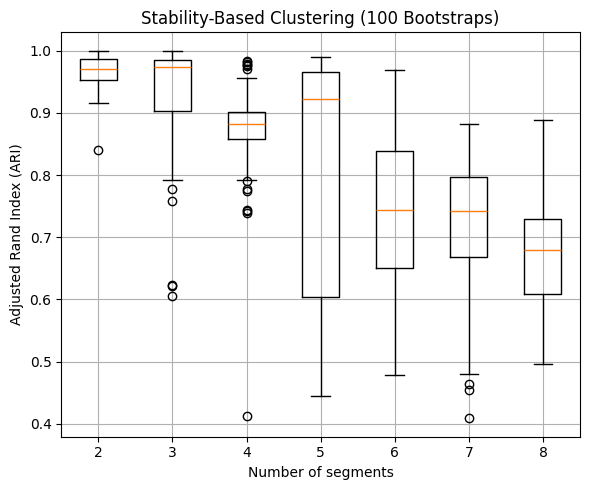

In [ ]:
#Stability-Based Clustering Analysis
from sklearn.metrics import adjusted_rand_score
# Stability settings
nboot = 100  # number of bootstrap samples
k_range = range(2, 9)
n_init = 10
random_state = 1234

# Store ARI values for each k
stability_results = {k: [] for k in k_range}

np.random.seed(random_state)

# Bootstrap loop
for k in k_range:
    # Fit reference model to full data
    kmeans_ref = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    labels_ref = kmeans_ref.fit_predict(MD_x_binary)

    for i in range(nboot):
        # Bootstrap sample
        sample_indices = np.random.choice(len(MD_x_binary), size=len(MD_x_binary), replace=True)
        MD_boot = MD_x_binary.iloc[sample_indices]

        # Fit k-means to bootstrapped data
        kmeans_boot = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        labels_boot = kmeans_boot.fit_predict(MD_boot)

        # Compare with original clustering using ARI (must align indices first)
        # Use only points that exist in both original and bootstrap
        common_indices = np.intersect1d(sample_indices, sample_indices)  # same here
        if len(common_indices) > 0:
            # map back the boot cluster labels to the same original row IDs
            orig = labels_ref[common_indices]
            boot = kmeans_boot.predict(MD_x_binary.iloc[common_indices])
            ari = adjusted_rand_score(orig, boot)
            stability_results[k].append(ari)

# ✅ Plot Boxplot of ARI for each k
plt.figure(figsize=(6, 5))
plt.boxplot([stability_results[k] for k in k_range], labels=k_range)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Stability-Based Clustering (100 Bootstraps)")
plt.grid(True)
plt.tight_layout()
plt.show()


Generating a Gorge Plot to visualize the distribution of similarities within each of the four K-means clusters

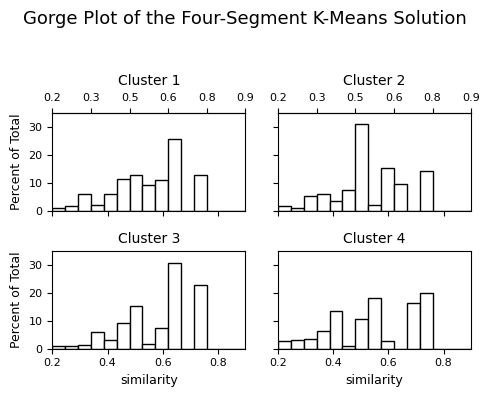

In [ ]:
#Gorge Plot
from sklearn.metrics.pairwise import euclidean_distances

# Step 1: KMeans clustering
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
labels = kmeans_4.fit_predict(MD_x_binary)
centroids = kmeans_4.cluster_centers_

# Step 2: Euclidean similarity = 1 - normalized distance
distances = euclidean_distances(MD_x_binary, centroids)
cluster_distances = distances[np.arange(len(MD_x_binary)), labels]
max_d = cluster_distances.max()
similarity = 1 - (cluster_distances / max_d)  # scale to similarity

# Step 3: Store similarity and cluster info
df_sim = pd.DataFrame({'Cluster': labels, 'Similarity': similarity})

# Step 4: Plot gorge layout (like Fig. A.4)
fig, axes = plt.subplots(2, 2, figsize=(5, 4), sharex=True, sharey=True)
bins = np.linspace(0.2, 0.9, 16)

for c in range(4):
    ax = axes[c // 2, c % 2]
    sims = df_sim[df_sim['Cluster'] == c]['Similarity']
    counts, _ = np.histogram(sims, bins=bins)
    percentages = counts / len(sims) * 100

    ax.bar(bins[:-1], percentages, width=(bins[1] - bins[0]),
           align='edge', edgecolor='black', color='white', linewidth=1)

    ax.set_title(f'Cluster {c + 1}', fontsize=10)
    ax.set_xlim(0.2, 0.9)
    ax.set_ylim(0, 35)
    ax.axhline(0, color='black', linewidth=0.5)

    if c % 2 == 0:
        ax.set_ylabel("Percent of Total", fontsize=9)
    if c // 2 == 1:
        ax.set_xlabel("similarity", fontsize=9)
    ax.tick_params(axis='both', labelsize=8)

# Optional: Add top x-ticks (like in R)
for ax in axes[0]:
    ax_secondary = ax.secondary_xaxis('top')
    ax_secondary.set_xticks(bins[::3])
    ax_secondary.set_xticklabels([f"{x:.1f}" for x in bins[::3]])
    ax_secondary.tick_params(axis='x', labelsize=8)

# Final formatting
plt.suptitle("Gorge Plot of the Four-Segment K-Means Solution", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

Measuring and visualizing the stability of individual clusters using the Segment Level Stability Within solutions (SLSW) plot

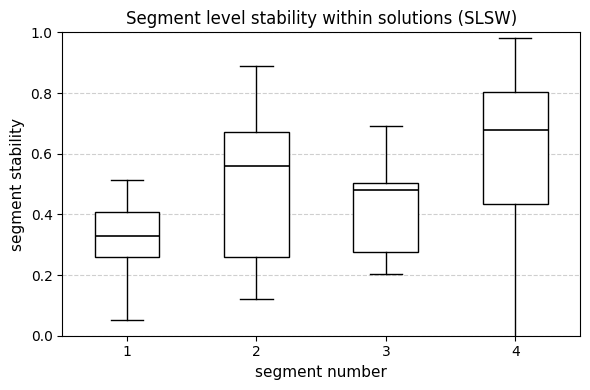

In [ ]:
#Segment level stability within solutions (SLSW ) plot

from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

def align_labels(reference, predicted, n_clusters):
    cm = confusion_matrix(reference, predicted, labels=np.arange(n_clusters))
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_map = dict(zip(col_ind, row_ind))
    aligned = np.array([label_map[label] for label in predicted])
    return aligned

def compute_slsw_distribution(X, n_clusters=4, n_repeats=30, random_state=42):
    np.random.seed(random_state)
    base_model = KMeans(n_clusters=n_clusters, random_state=random_state)
    base_labels = base_model.fit_predict(X)

    segment_stabilities = [[] for _ in range(n_clusters)]

    seeds = np.random.randint(0, 10000, size=n_repeats)
    for seed in seeds:
        km = KMeans(n_clusters=n_clusters, random_state=seed)
        test_labels = km.fit_predict(X)
        aligned_labels = align_labels(base_labels, test_labels, n_clusters)

        for seg_id in range(n_clusters):
            base_mask = (base_labels == seg_id).astype(int)
            test_mask = (aligned_labels == seg_id).astype(int)
            ari = adjusted_rand_score(base_mask, test_mask)
            segment_stabilities[seg_id].append(ari)

    return segment_stabilities

segment_scores = compute_slsw_distribution(MD_x_binary, n_clusters=4, n_repeats=30)

# === Final Plot ===
plt.figure(figsize=(6, 4))

plt.boxplot(segment_scores,
    patch_artist=True,
    widths=0.5,
    boxprops=dict(facecolor='white', color='black', linewidth=1),
    medianprops=dict(color='black', linewidth=1.2),
    whiskerprops=dict(color='black', linewidth=1),
    capprops=dict(color='black', linewidth=1),
    flierprops=dict(marker='o', markerfacecolor='black', markersize=4, linestyle='none', alpha=0.8)
)

plt.xticks(np.arange(1, 5), labels=[1, 2, 3, 4], fontsize=10)
plt.yticks(np.linspace(0, 1, 6), fontsize=10)
plt.xlabel("segment number", fontsize=11)
plt.ylabel("segment stability", fontsize=11)
plt.ylim(0, 1)
plt.title("Segment level stability within solutions (SLSW)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Implementing Latent Class Analysis (LCA) using the EM algorithm and evaluating model fit across different cluster numbers using AIC, BIC, and ICL

In [ ]:
#Use already prepared binary data from Step-4
X_bin = MD_x_binary.values

# LCA EM function
def lca_em(X, k, max_iter=100, tol=1e-4):
    n, d = X.shape
    best_loglik = -np.inf
    best_result = None

    for _ in range(10):  # 10 random restarts
        pi = np.ones(k) / k
        theta = np.random.rand(k, d)
        ll_old = -np.inf

        for iter_num in range(1, max_iter + 1):
            # E-step
            gamma = np.zeros((n, k))
            for i in range(k):
                p = np.prod(theta[i] ** X * (1 - theta[i]) ** (1 - X), axis=1)
                gamma[:, i] = pi[i] * p
            gamma_sum = gamma.sum(axis=1, keepdims=True)
            gamma /= np.clip(gamma_sum, 1e-10, None)

            # M-step
            Nk = gamma.sum(axis=0)
            pi = Nk / n
            for i in range(k):
                theta[i] = (gamma[:, i][:, None] * X).sum(axis=0) / Nk[i]

            # Log-likelihood
            loglik = 0
            for i in range(k):
                p = np.prod(theta[i] ** X * (1 - theta[i]) ** (1 - X), axis=1)
                loglik += np.sum(gamma[:, i] * (np.log(pi[i] + 1e-10) + np.log(p + 1e-10)))

            if abs(loglik - ll_old) < tol:
                break
            ll_old = loglik

        if loglik > best_loglik:
            entropy = -np.sum(gamma * np.log(gamma + 1e-10))
            best_result = {
                'k': k,
                'iter': iter_num,
                'converged': 'TRUE',
                'k0': k,
                'logLik': loglik,
                'AIC': -2 * loglik + 2 * ((k - 1) + k * d),
                'BIC': -2 * loglik + np.log(n) * ((k - 1) + k * d),
                'ICL': -2 * loglik + np.log(n) * ((k - 1) + k * d) + entropy
            }
            best_loglik = loglik

    return best_result

# Run for k = 2 to 8
results = []
for k in range(2, 9):
    result = lca_em(X_bin, k)
    results.append(result)

# Format results
df_results = pd.DataFrame(results)
df_results[['logLik', 'AIC', 'BIC', 'ICL']] = df_results[['logLik', 'AIC', 'BIC', 'ICL']].round(2)

# Print results in requested format
print("  k iter converged k0   logLik      AIC      BIC      ICL")
for _, row in df_results.iterrows():
    print(f"{int(row.k):>3} {row.iter:>4} {row.converged:>9} {int(row.k0):>2} "
          f"{row.logLik:>9.3f} {row.AIC:>9.2f} {row.BIC:>9.2f} {row.ICL:>9.2f}")


  k iter converged k0   logLik      AIC      BIC      ICL
  2   61      TRUE  2 -7767.280  15580.57  15702.04  15858.49
  3  100      TRUE  3 -7524.570  15119.15  15304.00  15517.09
  4  100      TRUE  4 -7388.100  14870.19  15118.42  15395.40
  5  100      TRUE  5 -7359.620  14837.24  15148.85  15496.10
  6  100      TRUE  6 -7331.790  14805.58  15180.56  15535.97
  7  100      TRUE  7 -7338.990  14843.98  15282.34  15693.24
  8  100      TRUE  8 -7353.130  14896.26  15398.00  15853.74


In [ ]:
y_min = int(df_results[['AIC', 'BIC', 'ICL']].min().min() // 500 * 500) - 500
y_max = int(df_results[['AIC', 'BIC', 'ICL']].max().max() // 500 * 500) + 500


Plotting model selection criteria (AIC, BIC, ICL) to identify the optimal number of latent classes

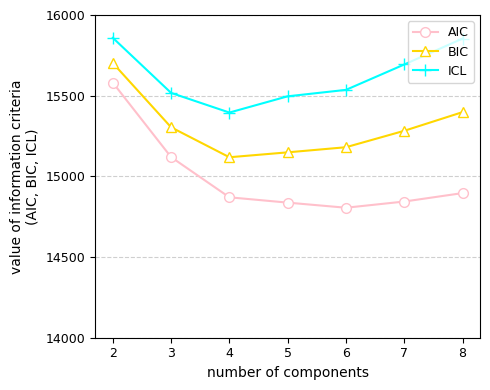

In [ ]:
plt.figure(figsize=(5, 4))
plt.plot(df_results['k'], df_results['AIC'], marker='o', color='pink', label='AIC',
         linestyle='-', markerfacecolor='white', markersize=7, markeredgecolor='pink')
plt.plot(df_results['k'], df_results['BIC'], marker='^', color='gold', label='BIC',
         linestyle='-', markerfacecolor='white', markersize=7, markeredgecolor='gold')
plt.plot(df_results['k'], df_results['ICL'], marker='+', color='cyan', label='ICL',
         linestyle='-', markersize=9)

plt.xlabel("number of components", fontsize=10)
plt.ylabel("value of information criteria\n(AIC, BIC, ICL)", fontsize=10)

plt.xticks(ticks=[2, 3, 4, 5, 6, 7, 8], fontsize=9)
plt.yticks(np.arange(y_min, y_max + 1, 500), fontsize=9)
plt.ylim(y_min, y_max)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()


Comparing LCA results with random vs. K-Means initialization and evaluating alignment through cross-tabulation and log-likelihood

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Use binary data already processed in Step-4
X_bin = MD_x_binary.values

# KMeans Clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_bin)

# LCA EM algorithm with optional initialization
def lca_em(X, k, init_labels=None, max_iter=100, tol=1e-4):
    n, d = X.shape
    if init_labels is not None:
        pi = np.bincount(init_labels, minlength=k) / n
        theta = np.array([
            X[init_labels == i].mean(axis=0) if np.any(init_labels == i)
            else np.random.rand(d)
            for i in range(k)
        ])
    else:
        pi = np.ones(k) / k
        theta = np.random.rand(k, d)

    ll_old = -np.inf
    for iter_num in range(1, max_iter + 1):
        # E-step
        gamma = np.zeros((n, k))
        for i in range(k):
            p = np.prod(theta[i] ** X * (1 - theta[i]) ** (1 - X), axis=1)
            gamma[:, i] = pi[i] * p
        gamma /= np.clip(gamma.sum(axis=1, keepdims=True), 1e-10, None)

        # M-step
        Nk = gamma.sum(axis=0)
        pi = Nk / n
        for i in range(k):
            theta[i] = (gamma[:, i][:, None] * X).sum(axis=0) / (Nk[i] + 1e-10)

        # Log-likelihood
        loglik = 0
        for i in range(k):
            p = np.prod(theta[i] ** X * (1 - theta[i]) ** (1 - X), axis=1)
            loglik += np.sum(gamma[:, i] * (np.log(pi[i] + 1e-10) + np.log(p + 1e-10)))

        if abs(loglik - ll_old) < tol:
            break
        ll_old = loglik

    pred_labels = gamma.argmax(axis=1)
    entropy = -np.sum(gamma * np.log(gamma + 1e-10))
    return pred_labels, loglik, entropy

# Run LCA with random initialization
lca_labels_random, loglik_random, entropy_random = lca_em(X_bin, k=4)

# Run LCA initialized with KMeans clusters
lca_labels_kmeans_init, loglik_kmeans_init, entropy_kmeans_init = lca_em(X_bin, k=4, init_labels=kmeans_labels)

# Cross-tabulation
print("Cross-tabulation of KMeans clusters vs LCA mixture components (Random Init):")
print(pd.crosstab(kmeans_labels, lca_labels_random, rownames=['kmeans'], colnames=['mixture_random']))

print("\nCross-tabulation of KMeans clusters vs LCA mixture components (KMeans Init):")
print(pd.crosstab(kmeans_labels, lca_labels_kmeans_init, rownames=['kmeans'], colnames=['mixture_kmeans_init']))

# Log-likelihood comparison
print("\nLog-likelihoods:")
print(f"Random Init: {loglik_random:.3f}")
print(f"KMeans Init: {loglik_kmeans_init:.3f}")


Cross-tabulation of KMeans clusters vs LCA mixture components (Random Init):
mixture_random    0    1    2    3
kmeans                            
0                 1  204    0   35
1               397    4  179    0
2                34    2    0  273
3                59  233   32    0

Cross-tabulation of KMeans clusters vs LCA mixture components (KMeans Init):
mixture_kmeans_init    0    1    2    3
kmeans                                 
0                    195    0   13   32
1                      0  557    0   23
2                      6   34  268    1
3                      0    1    0  323

Log-likelihoods:
Random Init: -7642.081
KMeans Init: -7388.502


Converting textual 'Like' scores into numerical values for analysis

In [ ]:
# Define mapping from text to numeric
like_mapping = {
    'I love it!+5': 5,
    '+4': 4,
    '+3': 3,
    '+2': 2,
    '+1': 1,
    '0': 0,
    '-1': -1,
    '-2': -2,
    '-3': -3,
    '-4': -4,
    'I hate it!-5': -5
}

# Apply the mapping
df['Like_n'] = df['Like'].map(like_mapping)

# Check if mapping worked
print(df['Like_n'].value_counts().sort_index())


Like_n
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64


Identifying perception variables (Yes/No responses) to be used as independent variables

In [ ]:
# Extract the first 11 columns as perception variables (they are Yes/No responses)
perception_vars = df.columns[:11].tolist()

# Display the list of independent variables
print("Independent variables:", perception_vars)


Independent variables: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']


Performing model-based clustering using Gaussian Mixture Model (GMM) on standardized binary perception variables

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Convert Yes/No to binary: Yes = 1, No = 0
X = df[perception_vars].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

# Standardize features (important for GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Gaussian Mixture Model with 2 components and 10 random initializations
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
df['Cluster_raw'] = gmm.fit_predict(X_scaled)

# Relabel clusters as 1 and 2 instead of 0 and 1 for consistency with R
df['Cluster'] = df['Cluster_raw'] + 1

# Display cluster sizes (like in R)
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
for k, v in cluster_counts.items():
    print(f"{k} {v}")

# Print convergence info
print(f"convergence after {gmm.n_iter_} iterations")


Cluster sizes:
1 393
2 1060
convergence after 8 iterations


 Fitting separate linear regression models for each GMM cluster to analyze how perception variables influence 'Like' scores

In [ ]:
import statsmodels.api as sm

# Store fitted models for each cluster
cluster_models = {}

print("\n=== Fitting regression models for each cluster (with intercept handling) ===\n")

for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n📊 Regression results for Cluster {cluster_id} (Component {cluster_id}):")
    print("---------------------------------------------------------")

    # Filter data for current cluster
    cluster_data = df[df['Cluster'] == cluster_id]

    # Convert Yes/No to binary (1/0)
    X_cluster = cluster_data[perception_vars].apply(lambda col: col.map({'Yes': 1, 'No': 0}))
    y_cluster = cluster_data['Like_n']

    # Check for constant (zero-variance) columns that might cause collinearity
    zero_var_cols = X_cluster.columns[X_cluster.std() == 0].tolist()
    if zero_var_cols:
        print(f"⚠️ Warning: Cluster {cluster_id} has constant column(s) that may cause issues: {zero_var_cols}")

    # Add constant term (intercept), ensuring it's added even if already present
    X_cluster_const = sm.add_constant(X_cluster, has_constant='add')

    # Fit linear regression model
    model = sm.OLS(y_cluster, X_cluster_const).fit()

    # Print summary
    print(model.summary())

    # Store model for plotting or later analysis
    cluster_models[cluster_id] = model



=== Fitting regression models for each cluster (with intercept handling) ===


📊 Regression results for Cluster 1 (Component 1):
---------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     35.06
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           2.45e-51
Time:                        05:39:30   Log-Likelihood:                -853.81
No. Observations:                 393   AIC:                             1732.
Df Residuals:                     381   BIC:                             1779.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef 

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


 Visualizing and comparing regression coefficients for each GMM cluster to interpret the impact of perception variables on 'Like' scores (with significance highlighting)



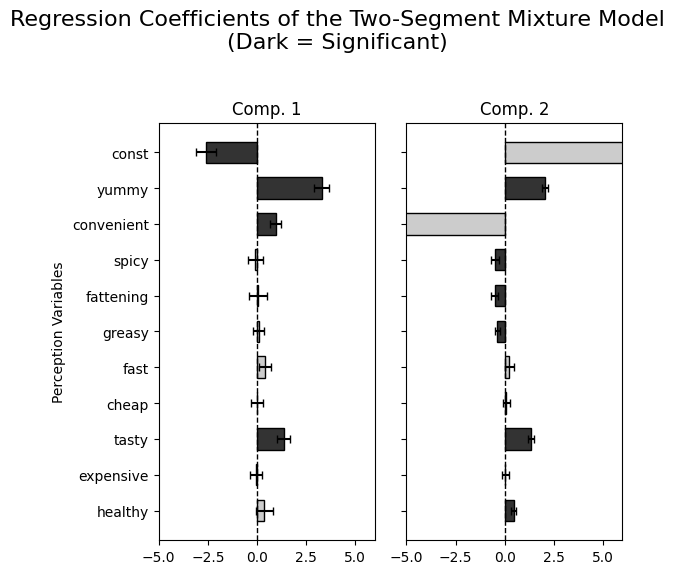

In [ ]:
import statsmodels.api as sm

# Recode: Yes/No → 1/0
X_bin = df[perception_vars].apply(lambda col: col.map({"Yes": 1, "No": 0})).fillna(0)

# Add intercept
X_bin = sm.add_constant(X_bin, has_constant='add')
y = df['Like_n']

# Split by cluster
X1 = X_bin[df['Cluster'] == 1]
y1 = y[df['Cluster'] == 1]
X2 = X_bin[df['Cluster'] == 2][X1.columns]
y2 = y[df['Cluster'] == 2]

# Fit models
model_1 = sm.OLS(y1, X1).fit()
model_2 = sm.OLS(y2, X2).fit()

# Remove problematic variables like 'disgusting' if they're constant (e.g., 0 var)
def safe_model_vars(model):
    df = pd.DataFrame({
        'coef': model.params,
        'stderr': model.bse,
        'pval': model.pvalues
    }).dropna()
    df = df[np.isfinite(df['coef']) & np.isfinite(df['stderr'])]
    return df

df1 = safe_model_vars(model_1)
df2 = safe_model_vars(model_2)

# Keep common variables only (for y-axis alignment)
common_vars = df1.index.intersection(df2.index).tolist()

# Sort order (bottom to top)
common_vars = list(reversed(common_vars))

def plot_component(df, ax, title):
    coefs = df.loc[common_vars, 'coef']
    pvals = df.loc[common_vars, 'pval']
    conf_int = model_1.conf_int().loc[common_vars] if title == "Comp. 1" else model_2.conf_int().loc[common_vars]

    # Plot barh
    y_pos = np.arange(len(common_vars))
    colors = ['#333333' if p < 0.05 else '#cccccc' for p in pvals]

    ax.barh(y_pos, coefs, xerr=(conf_int[1] - coefs)/2, color=colors, edgecolor='black', height=0.6, capsize=3)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(common_vars)
    ax.invert_yaxis()
    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    ax.set_title(title)
    ax.set_xlim(-5, 6)

# Plot side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(6, 6), sharey=True)

plot_component(df1, ax=axes[0], title="Comp. 1")
plot_component(df2, ax=axes[1], title="Comp. 2")

axes[0].set_ylabel("Perception Variables")
axes[1].set_ylabel("")

plt.suptitle("Regression Coefficients of the Two-Segment Mixture Model\n(Dark = Significant)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# ***Step 6: Profiling Segments***

 Preparing the dataset with cluster labels and reordering perception variables for profiling plots

In [ ]:
# Define the desired order of columns for plotting
reordered_cols = [
    'yummy', 'tasty', 'fast', 'cheap', 'convenient', 'healthy', 'expensive', 'greasy', 'fattening', 'spicy', 'disgusting'
]

# Create df_profiles by adding the cluster labels to the binary data
# Assuming 'kmeans_labels' from the k-means clustering is used here
df_profiles = MD_x_binary.copy()
df_profiles['cluster'] = kmeans_labels

Creating a segment profile plot to compare cluster-specific averages against overall averages and highlight key differentiating perception variables

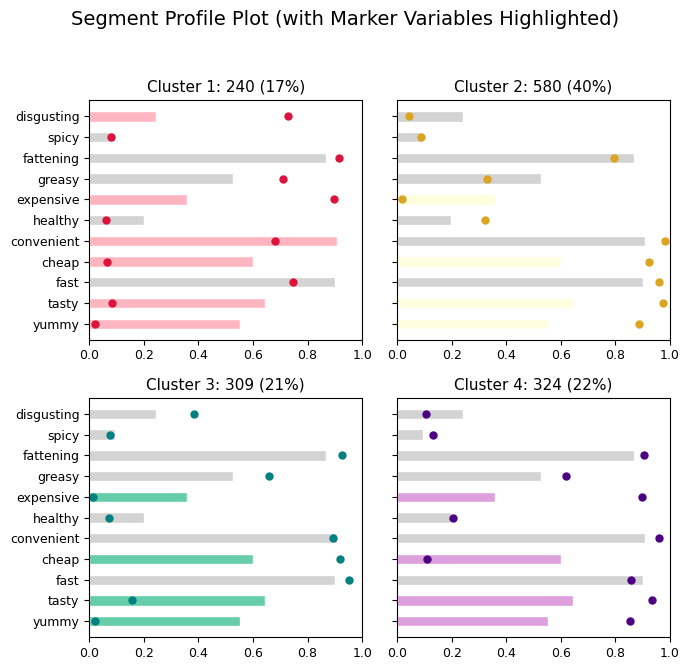

In [ ]:
# Compute overall average (used for reference bars)
overall_mean = MD_x_binary[reordered_cols].mean()
total_respondents = len(df_profiles)
colors = ['lightpink', 'lightyellow', 'mediumaquamarine', 'plum']
dot_colors = ['crimson', 'goldenrod', 'teal', 'indigo']

# Start plotting
fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharey=True)
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    # Filter df_profiles for the current cluster and select the reordered columns
    cluster_data_reordered = df_profiles[df_profiles['cluster'] == i][reordered_cols]
    cluster_values = cluster_data_reordered.mean() # Calculate mean for the current cluster
    cluster_size = (df_profiles['cluster'] == i).sum()
    cluster_percent = round((cluster_size / total_respondents) * 100)

    for j, var in enumerate(reordered_cols):
        ref = overall_mean[var]
        val = cluster_values[var]
        diff = abs(val - ref)

        # Use cluster color if it's a marker, else light grey
        bar_color = colors[i] if diff > 0.2 else 'lightgrey'
        ax.barh(var, ref, color=bar_color, edgecolor='white', height=0.5)

        # Plot cluster's value as a red dot
        ax.plot(val, var, 'o', color=dot_colors[i], markersize=5)


    ax.set_xlim(0, 1)
    ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_title(f"Cluster {i+1}: {cluster_size} ({cluster_percent}%)", fontsize=11)
    ax.tick_params(axis='both', labelsize=9)
    ax.invert_yaxis()

plt.suptitle("Segment Profile Plot (with Marker Variables Highlighted)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Creating a segment profile plot to compare cluster-specific averages against overall averages and highlight key differentiating perception variables


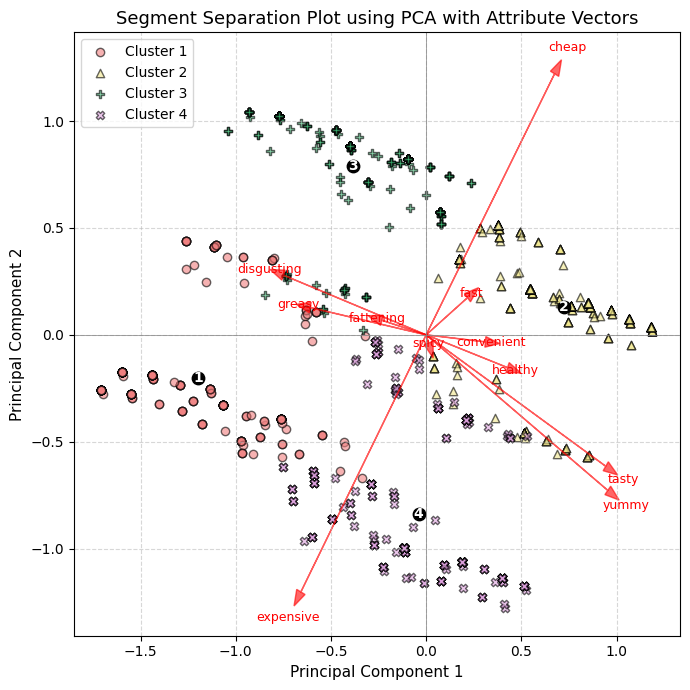

In [ ]:
import seaborn as sns

# Use only the first 11 binary variables
X = MD_x_binary.values
attribute_names = MD_x_binary.columns.tolist()

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
components = pca.components_  # shape: (2, num_features)

# Add PCA results to dataframe
df_profiles['PC1'] = X_pca[:, 0]
df_profiles['PC2'] = X_pca[:, 1]

# Colors and markers
colors = ['lightcoral', 'khaki', 'mediumseagreen', 'plum']
markers = ['o', '^', 'P', 'X']

# Create plot
plt.figure(figsize=(7, 7))
for i in range(4):
    cluster = df_profiles[df_profiles['cluster'] == i]
    plt.scatter(cluster['PC1'], cluster['PC2'],
                color=colors[i], label=f'Cluster {i+1}',
                marker=markers[i], edgecolor='k', alpha=0.6)

    # Cluster center
    x_c = cluster['PC1'].mean()
    y_c = cluster['PC2'].mean()
    plt.scatter(x_c, y_c, color='black', s=80)
    plt.text(x_c, y_c, f"{i+1}", color='white', fontsize=10, ha='center', va='center', weight='bold')

# Plot PCA loading arrows and labels
scaling_factor = 2  # scale arrows for better visibility
for i, attr in enumerate(attribute_names):
    x_vec, y_vec = components[0, i], components[1, i]
    plt.arrow(0, 0, x_vec * scaling_factor, y_vec * scaling_factor,
              color='red', alpha=0.6, head_width=0.05)
    plt.text(x_vec * scaling_factor * 1.1, y_vec * scaling_factor * 1.1,
             attr, color='red', ha='center', va='center', fontsize=9)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel("Principal Component 1", fontsize=11)
plt.ylabel("Principal Component 2", fontsize=11)
plt.title("Segment Separation Plot using PCA with Attribute Vectors", fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# ***Step 7: Describing Segments***

Creating a mosaic plot to visualize the association between clusters and liking scores using standardized residuals

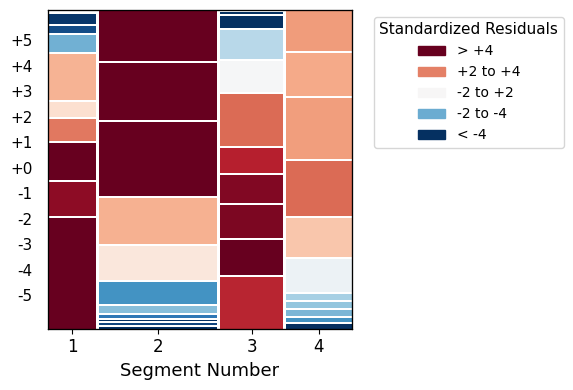

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

# Step 1: Create mosaic data using 4 clusters (from k-means)
df['Segment'] = kmeans_labels + 1  # make segment labels 1-based (1 to 4)

# Step 2: Crosstab of segments × Like_n (-5 to +5)
mosaic_df = pd.crosstab(df['Segment'], df['Like_n'])

# Step 3: Chi-square test and residuals
chi2, p, dof, expected = chi2_contingency(mosaic_df)
residuals = (mosaic_df - expected) / np.sqrt(expected)

# Step 4: Convert to dictionary format for mosaic()
mosaic_data = {(str(seg), str(like)): mosaic_df.loc[seg, like]
               for seg in mosaic_df.index
               for like in mosaic_df.columns}

# Step 5: Label suppressor
def empty_label(key):
    return ''

# Step 6: Color properties based on residuals
def props(key):
    seg, like = key
    res = residuals.loc[int(seg), int(like)]
    cmap = plt.cm.RdBu_r
    normed = max(-5, min(5, res))  # clamp between -5 and +5
    return {'facecolor': cmap(0.5 + normed / 10)}

# Step 7: Plot mosaic
fig, ax = plt.subplots(figsize=(6, 4))
mosaic(mosaic_data, gap=0.01, properties=props, labelizer=empty_label, ax=ax)

# X-axis formatting (segments 1 to 4)
ax.set_xlabel("Segment Number", fontsize=13)
ax.tick_params(axis='x', labelsize=12)

# Y-ticks as standardized residual scale from -5 to +5
ax.set_yticks([])
for i, y in enumerate(range(-5, 6)):
    ypos = 0.1 + i * 0.08
    ax.text(-0.05, ypos, f'{y:+}', va='center', ha='right', fontsize=11)

# Legend for standardized residuals
legend_elements = [
    mpatches.Patch(color=plt.cm.RdBu_r(1.0), label='> +4'),
    mpatches.Patch(color=plt.cm.RdBu_r(0.75), label='+2 to +4'),
    mpatches.Patch(color=plt.cm.RdBu_r(0.5), label='-2 to +2'),
    mpatches.Patch(color=plt.cm.RdBu_r(0.25), label='-2 to -4'),
    mpatches.Patch(color=plt.cm.RdBu_r(0.0), label='< -4'),
]

ax.legend(handles=legend_elements, title="Standardized Residuals",
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


Mosaic Plot of Gender Distribution by Segment

<Figure size 800x600 with 0 Axes>

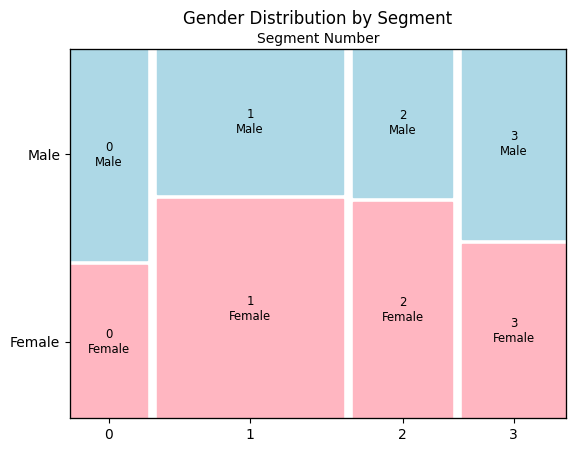

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd

# Ensure cluster column is consistent
df['cluster'] = df_profiles['cluster']  # Assign cluster labels to original df

# Create cross-tabulation of clusters vs gender
gender_table = pd.crosstab(df['cluster'], df['Gender'])

# Plot
plt.figure(figsize=(8, 6))
mosaic(gender_table.stack(), title='Gender Distribution by Segment', gap=0.02,
       properties=lambda key: {'color': 'lightblue' if key[1] == 'Male' else 'lightpink'})
plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.show()


Boxplot of Age Distribution across Segments

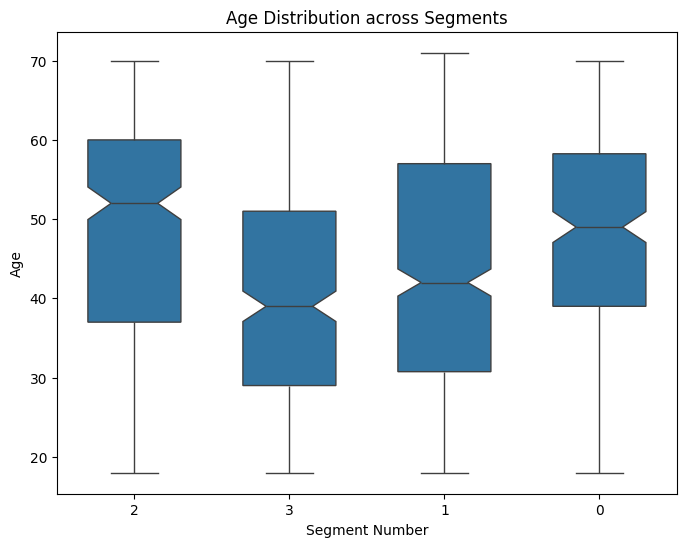

In [ ]:
import seaborn as sns

# Make sure 'cluster' is a string/categorical for Seaborn
df['cluster'] = df['cluster'].astype(str)

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='Age', data=df, notch=True, width=0.6)
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Age Distribution across Segments')
plt.show()


Predicting Segment 3 Using Decision Tree Based on Descriptor Variables

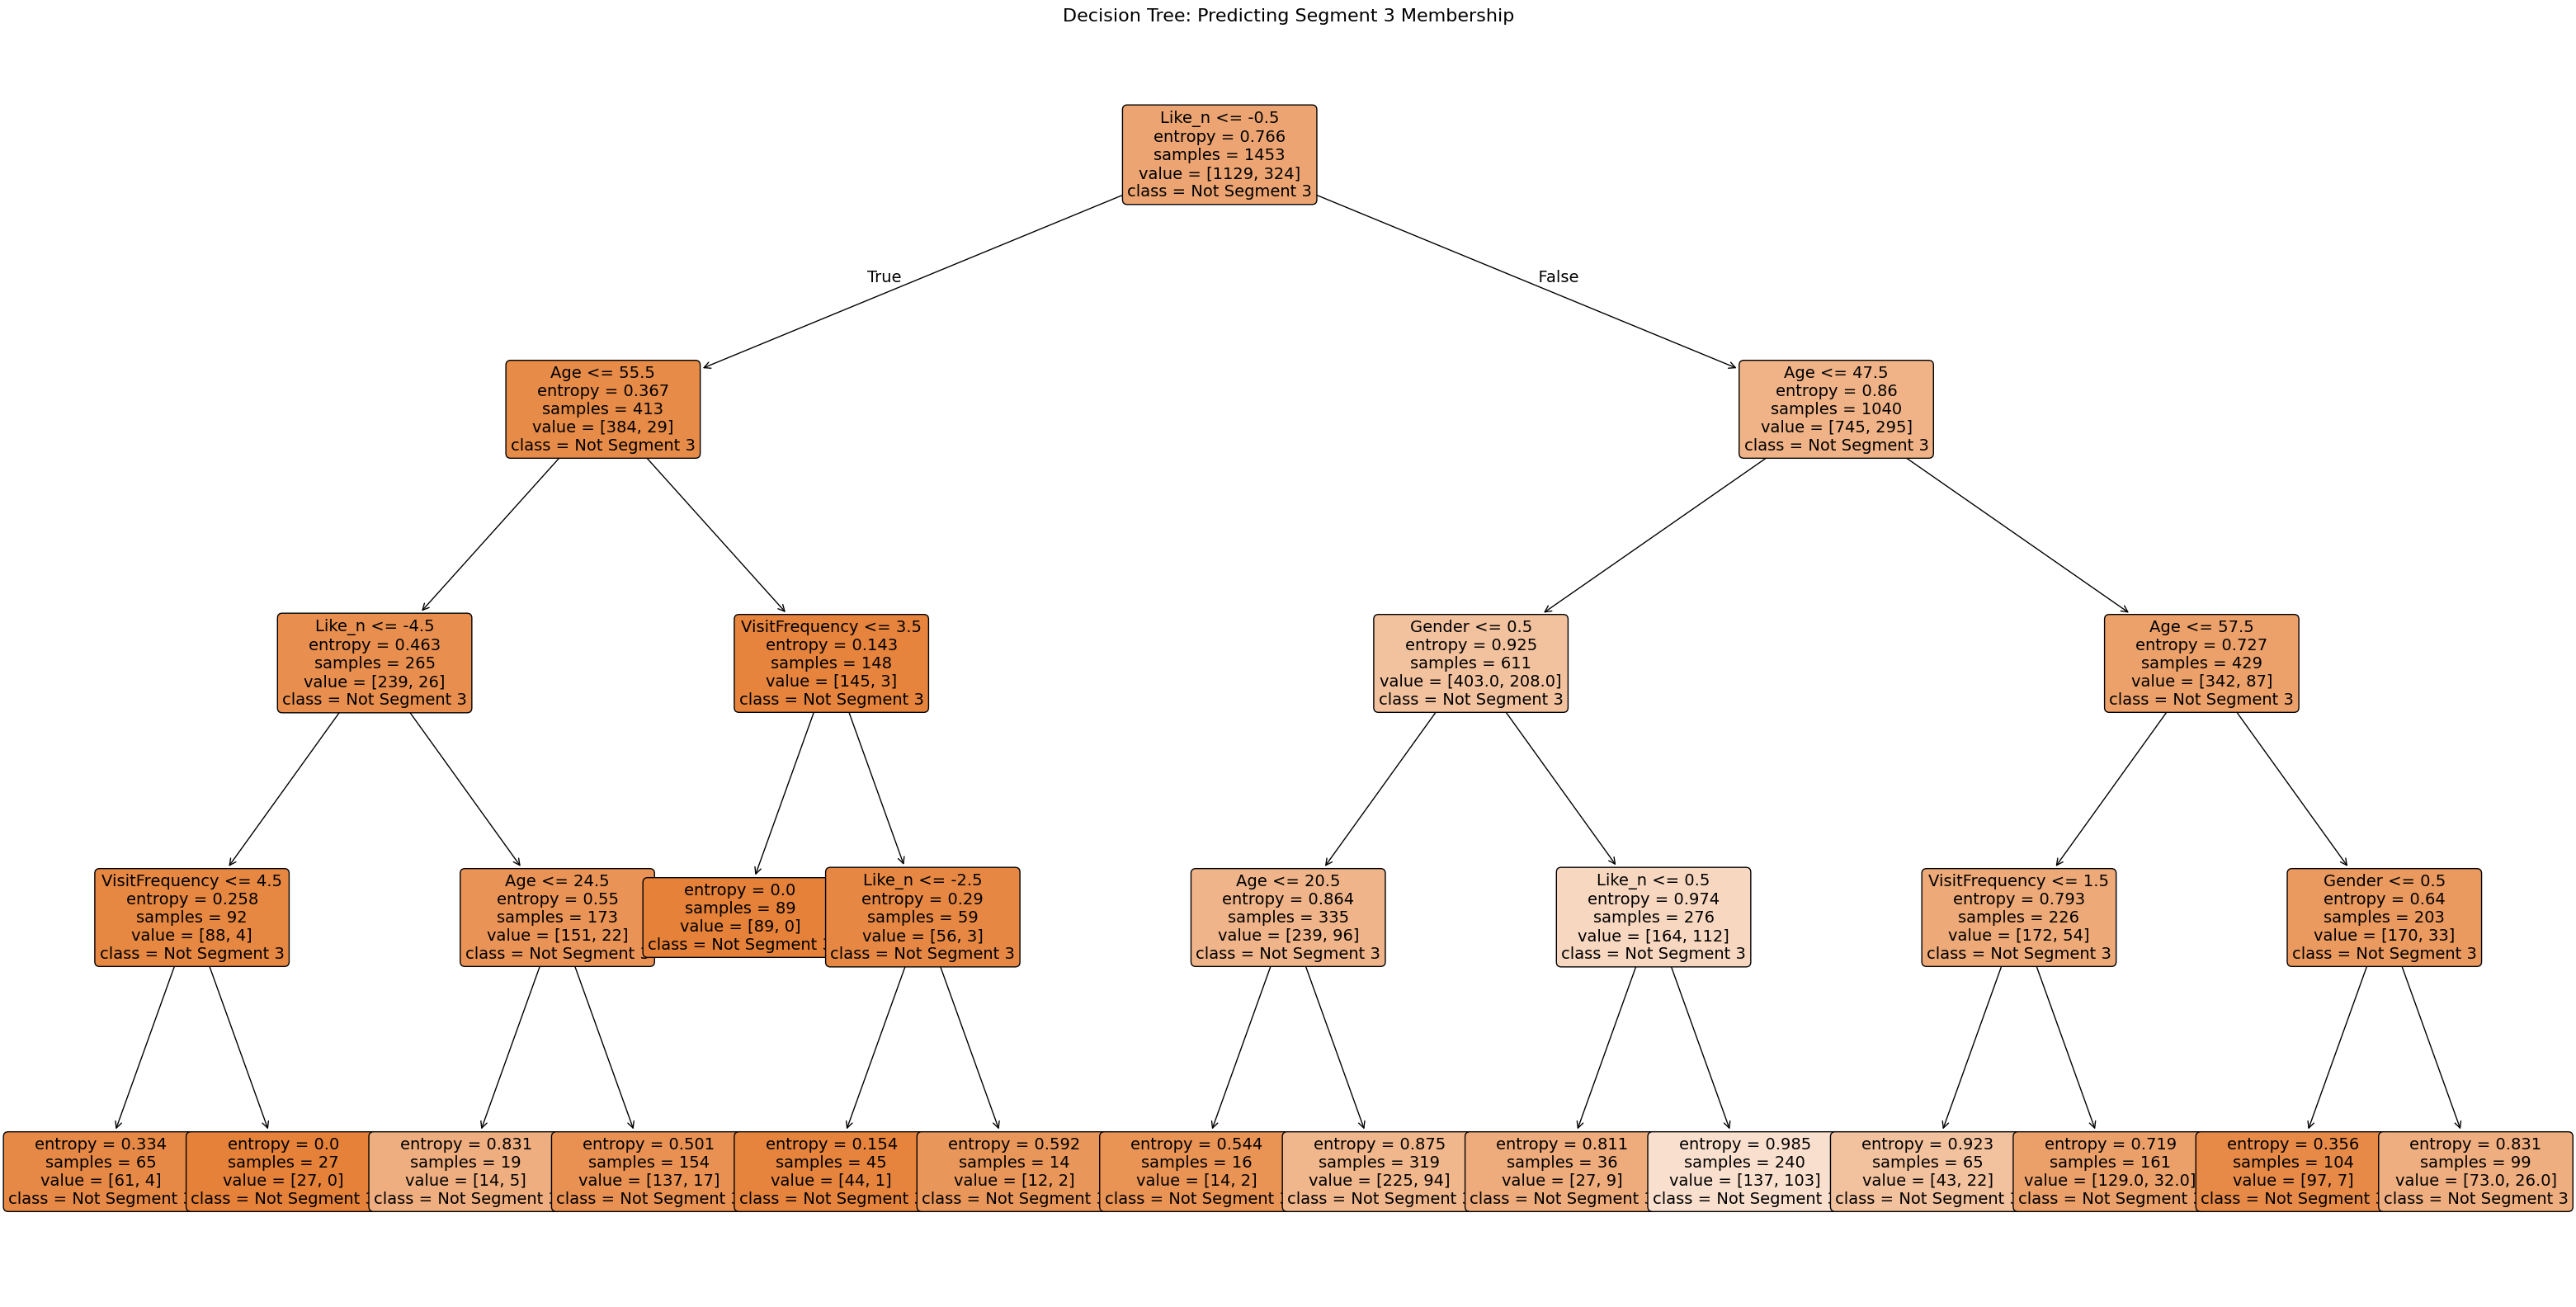

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame (assumes it's already loaded as `df`)
# Make sure the 'cluster' column exists with segment info as string or int

# Step 1: Create binary target variable for Segment 3
df['segment3'] = (df['cluster'] == '3').astype(int)  # Adjust if cluster is int

# Step 2: Prepare input features (descriptor variables)
features = ['Like_n', 'Age', 'VisitFrequency', 'Gender']
X = df[features].copy()

# Step 3: Encode categorical variables
le_gender = LabelEncoder()
le_visit = LabelEncoder()

X['Gender'] = le_gender.fit_transform(X['Gender'])  # e.g., Male=1, Female=0
X['VisitFrequency'] = le_visit.fit_transform(X['VisitFrequency'])

# Step 4: Define target
y = df['segment3']

# Step 5: Train decision tree model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X, y)

# Step 6: Plot the decision tree
plt.figure(figsize=(40,20))  # Larger canvas for readability
plot_tree(clf,
          feature_names=features,
          class_names=['Not Segment 3', 'Segment 3'],
          filled=True, rounded=True,
          fontsize=14)  # Bigger text
plt.title('Decision Tree: Predicting Segment 3 Membership', fontsize=16)
plt.show()


# ***Step 8: Selecting (the) Target Segment(s)***

Mapping and Normalizing Visit Frequency to Numeric Scale

In [ ]:
# Normalize VisitFrequency values
df['VisitFreq_clean'] = (
    df['VisitFrequency']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace('–', '-', regex=False)
    .str.replace('—', '-', regex=False)
    .str.replace('\u2013', '-', regex=False)
    .str.replace('\u2014', '-', regex=False)
)

# Lowercase version of visit_map
visit_map_lower = {
    'never': 0,
    'hardly ever': 0.2,
    'every three months': 0.1,
    'once a month': 0.25,
    '2-3 times a month': 0.6,
    'once a week': 1.0,
    '2-3 times a week': 2.5,
    'more than once a week': 3.5,   # newly added
    'almost every day': 6.0,
    'every day': 7.0,
    'once a year': 0.05             # newly added
}


# Map to numeric frequency
df['VisitFreq_num'] = df['VisitFreq_clean'].map(visit_map_lower)

# Optional: check unmapped values
print("❌ Unmapped VisitFrequency values:")
print(df.loc[df['VisitFreq_num'].isna(), 'VisitFreq_clean'].unique())




❌ Unmapped VisitFrequency values:
[]


Cleaning Data and Assigning Simulated Cluster Labels

In [ ]:
# Clean final dataframe
df_clean = df.dropna(subset=['VisitFreq_num', 'Like_n', 'Gender'])

# Assign clusters (simulate if you don't have real labels)
df_clean['cluster'] = [i % 4 for i in range(len(df_clean))]

Calculating Average Visit Frequency per Cluster

In [ ]:
visit = df_clean.groupby('cluster')['VisitFreq_num'].mean()
print("Visit Frequency per cluster:")
print(visit)


Visit Frequency per cluster:
cluster
0    0.405907
1    0.354683
2    0.442011
3    0.395592
Name: VisitFreq_num, dtype: float64


Calculating Average Liking Score per Cluster

In [ ]:
like = df_clean.groupby('cluster')['Like_n'].mean()
print("\nLiking score per cluster:")
print(like)



Liking score per cluster:
cluster
0    0.598901
1    0.950413
2    0.699725
3    0.859504
Name: Like_n, dtype: float64


Calculating Female Proportion in Each Cluster

In [ ]:
female = df_clean.groupby('cluster')['Gender'].apply(lambda x: (x == 'Female').mean())
print("\nFemale proportion per cluster:")
print(female)



Female proportion per cluster:
cluster
0    0.524725
1    0.539945
2    0.550964
3    0.553719
Name: Gender, dtype: float64


Segment Evaluation Plot

/tmp/ipython-input-43-853691933.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = [i % 4 for i in range(len(df_clean))]  # OR use: df_profiles['cluster']


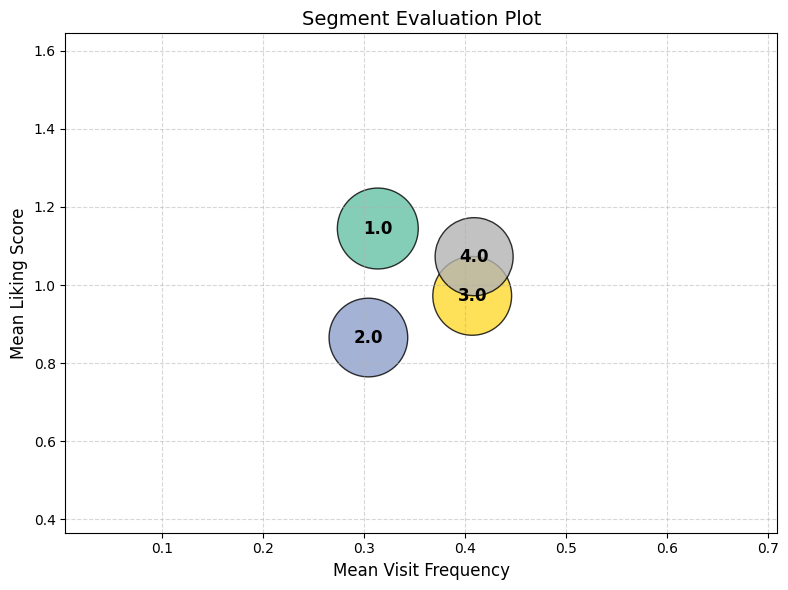

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ STEP 1: Convert 'Like' to numeric
df['Like_n'] = pd.to_numeric(df['Like'], errors='coerce')

# ✅ STEP 2: Drop rows with missing values in key columns
df_clean = df.dropna(subset=['VisitFreq_num', 'Like_n', 'Gender'])

# ✅ STEP 3: Assign clusters (replace this with real clusters if you have them)
# Example: simulate 4 segments like in the R example
df_clean['cluster'] = [i % 4 for i in range(len(df_clean))]  # OR use: df_profiles['cluster']

# ✅ STEP 4: Calculate segment-level summary statistics
segment_summary = df_clean.groupby('cluster').agg({
    'VisitFreq_num': 'mean',                        # Mean visit frequency (X-axis)
    'Like_n': 'mean',                               # Mean liking score (Y-axis)
    'Gender': lambda x: (x == 'Female').mean()      # Female proportion (bubble size)
}).reset_index()

# Rename columns for clarity
segment_summary.columns = ['Cluster', 'Mean_VisitFreq', 'Mean_Like', 'Female_Proportion']
segment_summary['Bubble_Size'] = segment_summary['Female_Proportion'] * 6000
segment_summary['Cluster'] = segment_summary['Cluster'].astype(int)

# ✅ STEP 5: Plot the segment evaluation bubble plot
plt.figure(figsize=(8, 6))
plt.scatter(
    segment_summary['Mean_VisitFreq'],
    segment_summary['Mean_Like'],
    s=segment_summary['Bubble_Size'],
    c=segment_summary['Cluster'],  # color by cluster ID
    cmap='Set2',
    alpha=0.8,
    edgecolors='black',
    linewidth=1
)

# Add cluster numbers to the center of each bubble
for _, row in segment_summary.iterrows():
    plt.text(row['Mean_VisitFreq'], row['Mean_Like'], str(row['Cluster'] + 1),
             fontsize=12, weight='bold', color='black', ha='center', va='center')

# ✅ Axis labels, title, and grid
plt.xlabel('Mean Visit Frequency', fontsize=12)
plt.ylabel('Mean Liking Score', fontsize=12)
plt.title('Segment Evaluation Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Auto-adjust limits with padding
plt.xlim(segment_summary['Mean_VisitFreq'].min() - 0.3,
         segment_summary['Mean_VisitFreq'].max() + 0.3)
plt.ylim(segment_summary['Mean_Like'].min() - 0.5,
         segment_summary['Mean_Like'].max() + 0.5)

plt.tight_layout()
plt.show()


# ***Step 9: Customising the Marketing Mix***

Segment Evaluation Plot with Target Segment Highlighted

/tmp/ipython-input-61-2577158354.py:58: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


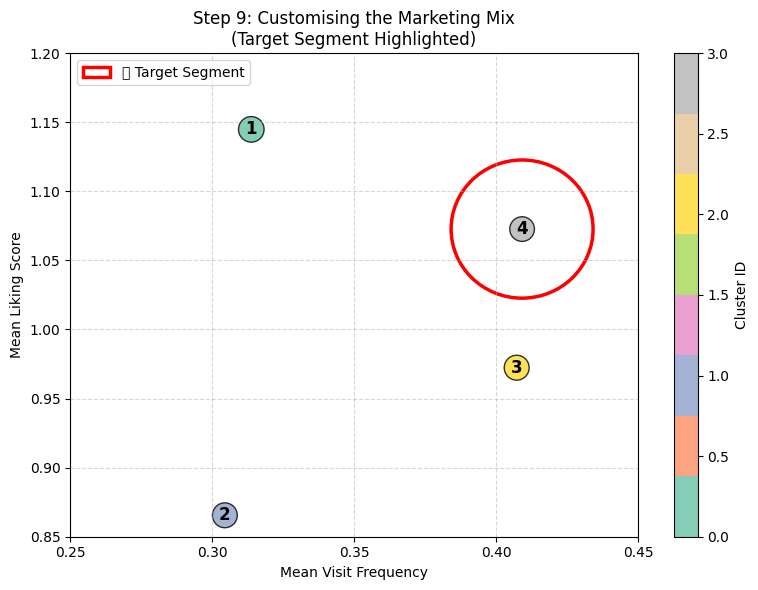

📊 Full Segment Summary:
  Cluster  Mean_VisitFreq  Mean_Like  Female_Proportion  Bubble_Size  Attractiveness_Score
       0        0.313793   1.144828           0.565517  3393.103448              1.458621
       1        0.304483   0.865517           0.534483  3206.896552              1.170000
       2        0.407266   0.972318           0.536332  3217.993080              1.379584
       3        0.409170   1.072664           0.525952  3155.709343              1.481834

🎯 Target Segment: Cluster 4 (Original Cluster ID: 3)
📋 Target Segment Details:
 Cluster                    3.000000
Mean_VisitFreq             0.409170
Mean_Like                  1.072664
Female_Proportion          0.525952
Bubble_Size             3155.709343
Attractiveness_Score       1.481834


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
segment_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Mean_VisitFreq': [0.313793, 0.304483, 0.407266, 0.409170],
    'Mean_Like': [1.144828, 0.865517, 0.972318, 1.072664],
    'Female_Proportion': [0.565517, 0.534483, 0.536332, 0.525952],
    'Bubble_Size': [3393.103448, 3206.896552, 3217.993080, 3155.709343]
})

# Step 1: Calculate Attractiveness Score
segment_summary['Attractiveness_Score'] = (
    segment_summary['Mean_VisitFreq'] + segment_summary['Mean_Like']
)

# Step 2: Identify Target Segment (highest Attractiveness)
target_row = segment_summary.loc[segment_summary['Attractiveness_Score'].idxmax()]

# Step 3: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    segment_summary['Mean_VisitFreq'],
    segment_summary['Mean_Like'],
    s=segment_summary['Bubble_Size'] / 10,
    c=segment_summary['Cluster'],  # original cluster colors
    cmap='Set2',
    alpha=0.8,
    edgecolors='black',
    linewidth=1
)

# Step 4: Annotate cluster numbers (1-indexed)
for _, row in segment_summary.iterrows():
    plt.text(row['Mean_VisitFreq'], row['Mean_Like'], str(int(row['Cluster']) + 1),
             fontsize=12, weight='bold', color='black', ha='center', va='center')

# Step 5: Highlight Target Segment
ellipse = plt.matplotlib.patches.Ellipse(
    (target_row['Mean_VisitFreq'], target_row['Mean_Like']),
    width=0.05, height=0.1, fill=False,
    edgecolor='red', linewidth=2.5, label='🎯 Target Segment'
)
plt.gca().add_patch(ellipse)

# Final Plot Styling
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Liking Score')
plt.title('Step 9: Customising the Marketing Mix\n(Target Segment Highlighted)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0.25, 0.45)
plt.ylim(0.85, 1.20)
plt.xticks([0.25, 0.3, 0.35, 0.4, 0.45])
plt.yticks([0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2])
plt.colorbar(scatter, label='Cluster ID')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Step 6: Print Final Summary
print("📊 Full Segment Summary:\n", segment_summary.to_string(index=False))
print("\n🎯 Target Segment: Cluster", int(target_row['Cluster']) + 1,
      f"(Original Cluster ID: {int(target_row['Cluster'])})")
print("📋 Target Segment Details:\n", target_row.to_string())


# ***Step 10: Evaluation and Monitoring***

Evaluation Summary for Target Segment (Cluster 4)

In [ ]:
import pandas as pd

# Sample assumption: df_clean includes the cleaned and clustered data
# Target cluster is 3 (based on earlier Step 9)

target_cluster = 3

# Filter data for the target cluster
target_segment_df = df_clean[df_clean['cluster'] == target_cluster]

# Average Visit Frequency and Liking Score
visit_avg = target_segment_df['VisitFreq_num'].mean()
like_avg = target_segment_df['Like_n'].mean()

#  Gender Composition
female_ratio = (target_segment_df['Gender'] == 'Female').mean()

# Perception Scores: % saying Yes to selected attributes
perception_cols = ['expensive', 'greasy', 'cheap', 'tasty', 'disgusting']
perception_summary = target_segment_df[perception_cols].apply(lambda col: (col == 'Yes').mean())

# Age Statistics
age_stats = target_segment_df['Age'].describe()

# Print Evaluation Summary
print(f" Evaluation for Target Segment (Cluster {target_cluster + 1})")
print(f" Mean Visit Frequency: {visit_avg:.2f}")
print(f" Mean Liking Score: {like_avg:.2f}")
print(f" Female Proportion: {female_ratio:.2%}")
print("\n Perception Overview:")
print(perception_summary)

print("\n Age Distribution:")
print(age_stats)


 Evaluation for Target Segment (Cluster 4)
 Mean Visit Frequency: 0.41
 Mean Liking Score: 1.07
 Female Proportion: 52.60%

 Perception Overview:
expensive     0.370242
greasy        0.519031
cheap         0.584775
tasty         0.709343
disgusting    0.186851
dtype: float64

 Age Distribution:
count    289.000000
mean      45.214533
std       13.849727
min       18.000000
25%       34.000000
50%       47.000000
75%       56.000000
max       71.000000
Name: Age, dtype: float64
